# Deep Learning - Brain Tumor
*Group Members*:

|      | Student Name                  | Student ID |
|---   |-------------------------------|------------|
| 1    | Mahmoud Ahmed                 | 20221397   |
| 2    | Alex Adrián Santander Morales | 20220658   |
| 3    | Skander Chaabini              | 20221041   |
| 4    | Karim Miladi                  | 20220720   |
| 5    | Mohamed Ettaher Ben Slama     | 20221039   |

## Learning Transfer

Since our dataset used is small, one method of addressing this lack of data in a given domain is to leverage data from a similar domain, a technique known as Transfer Learning (TL).

TL means using what is learned from one task and applying that to another task without learning from scratch.

![learning-transfer-concepts](assets/learning-transfer.png)

### AlexNet

#### Network Architecture

The architecture consists of eight layers: five convolutional layers and three fully-connected layers. But this isn’t what makes AlexNet special; these are some of the features used that are new approaches to convolutional neural networks

- It has 8 layers: 5 convolutional and 3 fully-connected.
- Uses ReLU non-linearity instead of the standard tanh function, which speeds up training time.
- Allows for multi-GPU training by splitting the model's neurons across multiple GPUs, which allows for bigger models and faster training times.
- Introduced overlapping pooling, which reduced error by about 0.5% and made it harder for models to overfit.

Input layer -> Conv1 -> MaxPool1 -> Norm1 -> Conv2 -> MaxPool2 -> Norm2 -> Conv3 -> Conv4 -> Conv5 -> MaxPool3 -> Dropout1 -> FC1 -> Dropout2 -> FC2 -> Output layer

![alexnet-arch](assets/alexnet.png)

#### Model Declaration

In [44]:
def AlexNet(input_shape=(256, 256, 1), n_classes=4):

    model = Sequential()

    # 1st conv layer
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), input_shape=input_shape, padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 2nd conv layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 3rd conv layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 4th conv layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 5th conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 1st fully connected layer
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # 2nd fully connected layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # 3rd fully connected layer --> output layer
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))

    return model


#### Model Compiling

In [46]:
alex_net_model = AlexNet(IMG_SHAPE, n_classes=4)
alex_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model Training

In [47]:
alex_net_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/10
125/125 [==============================] - 22s 163ms/step - loss: 2.9057 - accuracy: 0.5583 - val_loss: 2.7072 - val_accuracy: 0.4207
Epoch 2/10
125/125 [==============================] - 20s 157ms/step - loss: 0.8855 - accuracy: 0.7154 - val_loss: 0.8484 - val_accuracy: 0.6896
Epoch 3/10
125/125 [==============================] - 20s 154ms/step - loss: 0.7134 - accuracy: 0.7534 - val_loss: 1.1739 - val_accuracy: 0.5700
Epoch 4/10
125/125 [==============================] - 21s 164ms/step - loss: 0.6179 - accuracy: 0.7894 - val_loss: 0.8901 - val_accuracy: 0.6319
Epoch 5/10
125/125 [==============================] - 20s 156ms/step - loss: 0.6425 - accuracy: 0.7886 - val_loss: 0.4205 - val_accuracy: 0.8559
Epoch 6/10
125/125 [==============================] - 20s 161ms/step - loss: 0.5086 - accuracy: 0.8289 - val_loss: 0.8813 - val_accuracy: 0.7071
Epoch 7/10
125/125 [==============================] - 20s 157ms/step - loss: 0.5061 - accuracy: 0.8319 - val_loss: 0.6110 - val_ac

#### Plot Loss & Accuracy

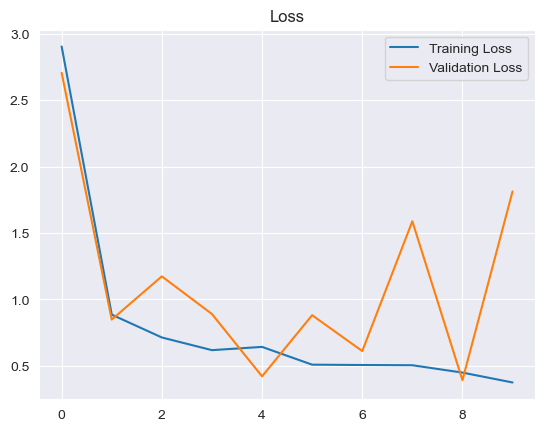

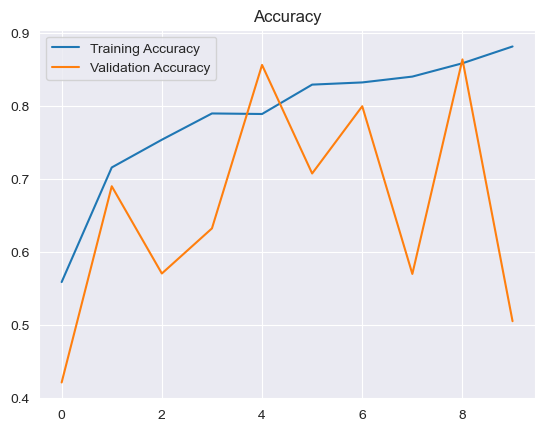

In [48]:
history = alex_net_model.history
plot_metrics(history.history)

#### Model Evaluation

In [49]:
alex_net_model.evaluate(x=X_val, y=y_val)

54/54 [==============================] - 3s 41ms/step - loss: 1.8134 - accuracy: 0.5047


[1.813435435295105, 0.5046674609184265]

54/54 [==============================] - 2s 41ms/step


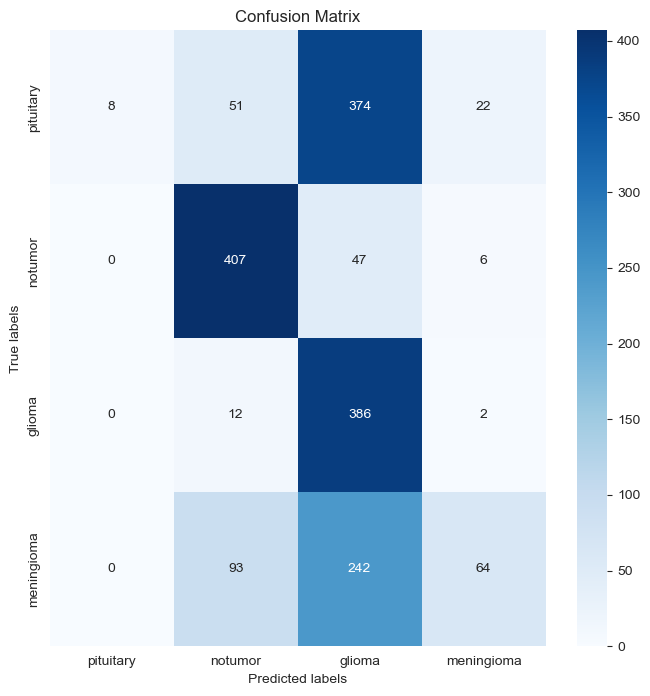

Confusion matrix
None
Classification Report
              precision    recall  f1-score   support

   pituitary       1.00      0.02      0.03       455
     notumor       0.72      0.88      0.80       460
      glioma       0.37      0.96      0.53       400
  meningioma       0.68      0.16      0.26       399

    accuracy                           0.50      1714
   macro avg       0.69      0.51      0.41      1714
weighted avg       0.70      0.50      0.41      1714

None


In [51]:
y_test_pred = alex_net_model.predict(X_val)
y_test_pred_arg = y_test_pred.argmax(axis=1)
co_mat = confusion_matrix(y_val, y_test_pred_arg, labels)

print(co_mat)
print(classification_report(y_val, y_test_pred_arg, labels))

### VGG16

U-Net is a fully convolutional neural network architecture that was originally designed for medical image segmentation tasks. It has a symmetric encoder-decoder structure with skip connections between corresponding layers in the encoder and decoder.

#### Network Architecture

VGGNet consists of 16 convolutional layers and is very appealing because of its very uniform architecture. Similar to AlexNet, only 3x3 convolutions, but lots of filters.

 It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another.


![unnet-arch](assets/vgg16.png)

#### Model Declaration

In [84]:
# VGG16
vgg = VGG16(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(units = 512, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.5)(x)
x = Dense(units = 5, activation='softmax')(x)
vgg16_model = Model(inputs=vgg.input, outputs=x)

#### Model Compiling

In [85]:
vgg16_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model Training

In [87]:
vgg16_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

Epoch 1/10
125/125 [==============================] - 73s 582ms/step - loss: 0.3691 - accuracy: 0.8847 - val_loss: 0.2457 - val_accuracy: 0.9247
Epoch 2/10
125/125 [==============================] - 75s 604ms/step - loss: 0.1117 - accuracy: 0.9620 - val_loss: 0.2243 - val_accuracy: 0.9306
Epoch 3/10
125/125 [==============================] - 69s 557ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.2018 - val_accuracy: 0.9411
Epoch 4/10
125/125 [==============================] - 71s 567ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.2149 - val_accuracy: 0.9382
Epoch 5/10
125/125 [==============================] - 70s 560ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.2012 - val_accuracy: 0.9411
Epoch 6/10
125/125 [==============================] - 70s 560ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.2360 - val_accuracy: 0.9364
Epoch 7/10
125/125 [==============================] - 72s 574ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.2241 - val_ac

#### Plot Loss & Accuracy

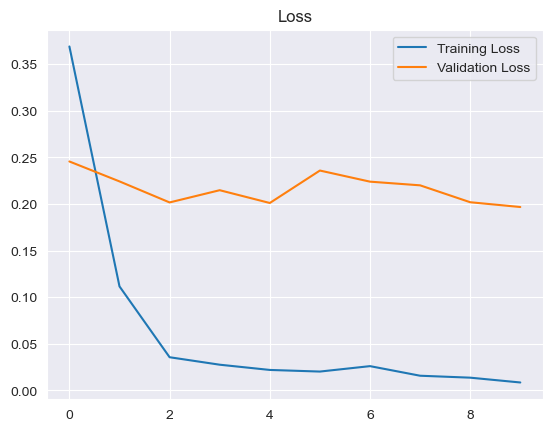

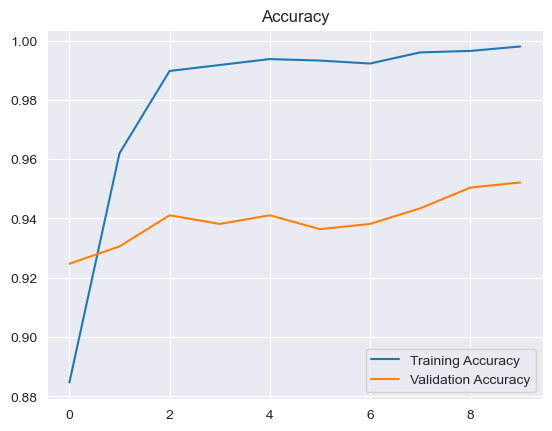

In [88]:
history = vgg16_model.history
plot_metrics(history.history)

#### Model Evaluation

In [90]:
vgg16_model.evaluate(x=X_test, y=y_test)

41/41 [==============================] - 16s 391ms/step - loss: 0.1934 - accuracy: 0.9458


[0.19341586530208588, 0.9458428621292114]

41/41 [==============================] - 16s 391ms/step


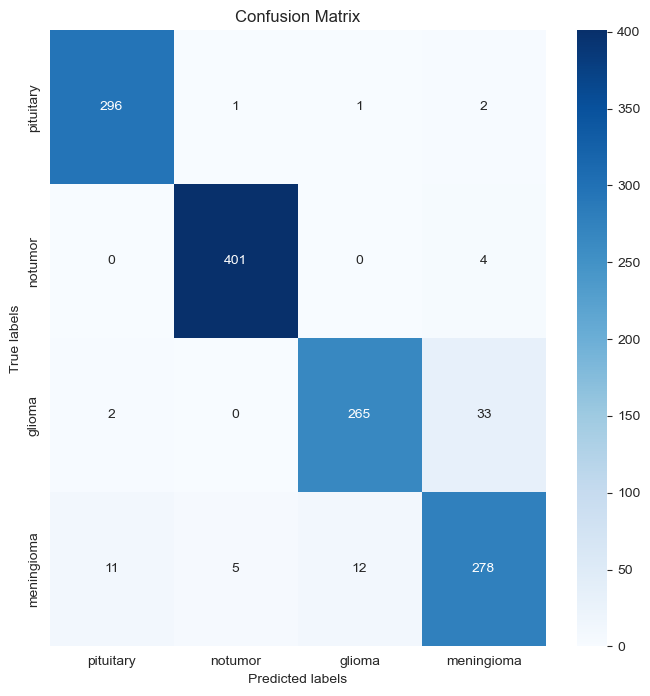

Confusion matrix
None
Classification Report
              precision    recall  f1-score   support

   pituitary       0.96      0.99      0.97       300
     notumor       0.99      0.99      0.99       405
      glioma       0.95      0.88      0.92       300
  meningioma       0.88      0.91      0.89       306

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311

None


In [91]:
y_test_pred = vgg16_model.predict(X_test)
y_test_pred_arg = y_test_pred.argmax(axis=1)
co_mat = confusion_matrix(y_test, y_test_pred_arg, labels)

print(co_mat)
print(classification_report(y_test, y_test_pred_arg, labels))

### EfficientNet

EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of a CNN such as depth/width/resolution using a compound coefficient.

We are going to initialize EfficientNetB1 model and use weight=‘imagenet’.

[ImageNet](https://www.image-net.org/) is a large visual database designed for use in visual object recognition software research.

#### Network Architecture

To Add our own layers on the top of EfficientNetB1:

- `GlobalAveragePooling2D` to replace fully connected layers. It takes the average of each feature map and feed the resulting vector directly into the softmax layer.
- `Dropout` to prevent overfitting by reducing the number of neurons.
- `Dense` as output layer with activation softmax since this is a multi-class classification problem.

![efficientnet-arch](assets/efficientnet.png)

EfficientNet model has 4 component:
- Stem layer
- final layer
- Sub-blocks: each block has sub-blocks.
- Modules: each sub-blocks has modules.

![efficient-moules](assets/efficient-moules.png)

#### Model Declaration

In [60]:
# build the model
effnet = EfficientNetB1(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

effnet_model = effnet.output
effnet_model = GlobalAveragePooling2D()(effnet_model)
effnet_model = Dropout(0.5)(effnet_model)
effnet_model = Dense(4, activation='softmax')(effnet_model)
effnet_model = Model(inputs=effnet.input, outputs=effnet_model)

effnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_12 (Rescaling)       (None, 256, 256, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization_6 (Normalization  (None, 256, 256, 3)  7          ['rescaling_12[0][0]']           
 )                                                                                                
                                                                                            

#### Model Compiling

In [61]:
effnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model Training

In [62]:
#train the model
effnet_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/10
125/125 [==============================] - 142s 960ms/step - loss: 0.3295 - accuracy: 0.8824 - val_loss: 0.7409 - val_accuracy: 0.8279
Epoch 2/10
125/125 [==============================] - 106s 836ms/step - loss: 0.1411 - accuracy: 0.9522 - val_loss: 0.4638 - val_accuracy: 0.8973
Epoch 3/10
125/125 [==============================] - 1402s 11s/step - loss: 0.1130 - accuracy: 0.9617 - val_loss: 0.4556 - val_accuracy: 0.8559
Epoch 4/10
125/125 [==============================] - 111s 881ms/step - loss: 0.0752 - accuracy: 0.9740 - val_loss: 0.1766 - val_accuracy: 0.9463
Epoch 5/10
125/125 [==============================] - 120s 961ms/step - loss: 0.0683 - accuracy: 0.9740 - val_loss: 0.2596 - val_accuracy: 0.9358
Epoch 6/10
125/125 [==============================] - 114s 909ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.1160 - val_accuracy: 0.9662
Epoch 7/10
125/125 [==============================] - 124s 986ms/step - loss: 0.0461 - accuracy: 0.9830 - val_loss: 0.1721 - 

#### Plot Loss & Accuracy

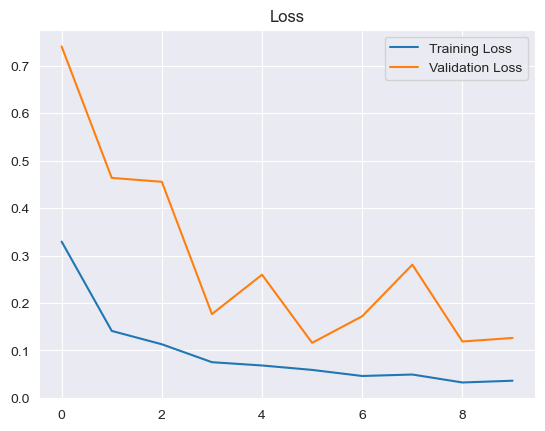

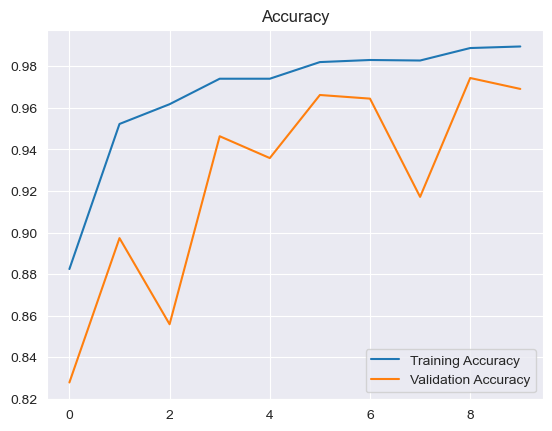

In [63]:
history = effnet_model.history
plot_metrics(history.history)

#### Model Evaluation

In [65]:
effnet_model.evaluate(x=X_test, y=y_test)

54/54 [==============================] - 10s 157ms/step - loss: 0.1263 - accuracy: 0.9691


[0.12626615166664124, 0.9690781831741333]

41/41 [==============================] - 9s 189ms/step


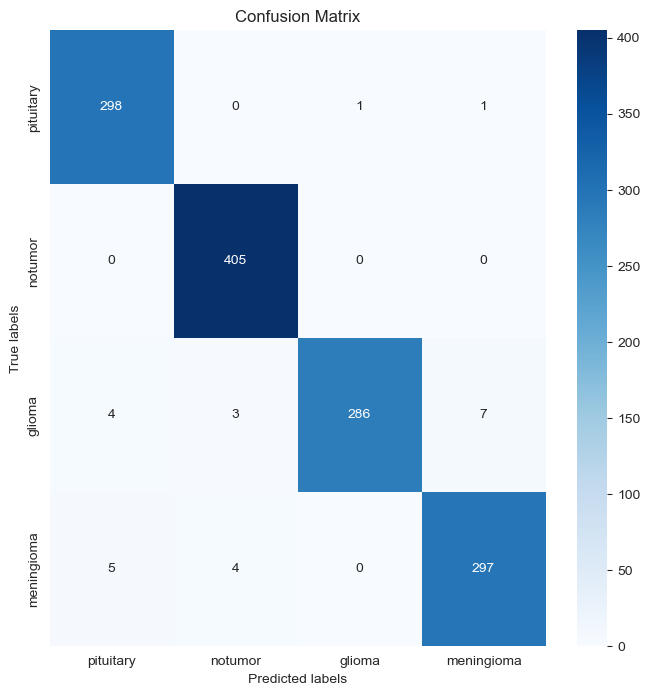

Confusion matrix
None
Classification Report
              precision    recall  f1-score   support

   pituitary       0.97      0.99      0.98       300
     notumor       0.98      1.00      0.99       405
      glioma       1.00      0.95      0.97       300
  meningioma       0.97      0.97      0.97       306

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311

None


In [67]:
y_test_pred = effnet_model.predict(X_test)
y_test_pred_arg = y_test_pred.argmax(axis=1)
co_mat = confusion_matrix(y_test, y_test_pred_arg, labels)

print(co_mat)
print(classification_report(y_test, y_test_pred_arg, labels))